#Lecture 12

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
import time
from mlxtend.plotting import plot_decision_regions
#import other modules here
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
#For animation in Colab
!pip install JSAnimation
from IPython.display import HTML

  Preparing metadata (setup.py) ... done
  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=11407 sha256=3312a89ad2f2a89d6eea08ed5400c895931206c17b6825df7fae7ed9027a8280
  Stored in directory: /root/.cache/pip/wheels/1e/16/64/028f540fe8f5eae5026a423bfd88356248074379b79f27b646
Successfully built JSAnimation


#Perceptron

In [50]:
# Generate synthetic dataset with 2 classes
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, random_state=6)

In [51]:
#your code here
y = 2*(y-0.5)

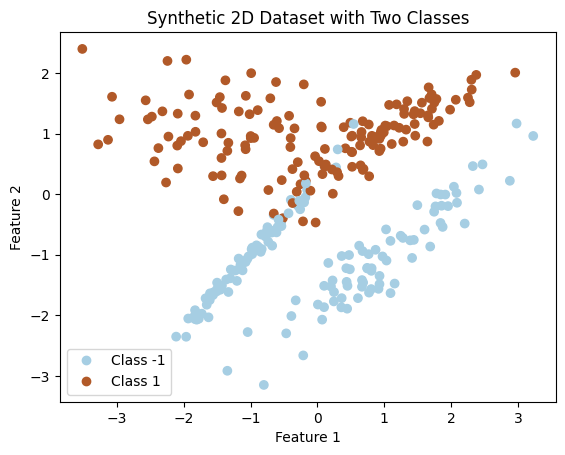

In [5]:
# Plot the synthetic dataset
scatter_train = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Dataset with Two Classes')
plt.legend(handles=scatter_train.legend_elements()[0], labels=['Class -1', 'Class 1'])
plt.savefig('1.jpg')

In [16]:
#X_add = np.hstack([np.ones((len(X),1)),X])

In [52]:
#w = np.random.rand(3)
w = np.random.rand(2)
w_trace = []
w_trace.append(w)
point = []
for epoch in range(1):
  for i in range(len(X)):
    #if y[i] * X_add[i, :].dot(w) < 0:
    if y[i] * X[i, :].dot(w) < 0:
            #w = w + y[i] * X_add[i, :]
            w = w + y[i] * X[i, :]
            w_trace.append(w)
            point.append(X[i,:])


In [54]:
fig, ax = plt.subplots(figsize=(5, 5))
x_min = min(X[:,0])
x_max = max(X[:,0])
y_min = min(X[:,1])
y_max = max(X[:,1])
x = np.arange(x_min, x_max, 0.1)
def update(frame):
    i = frame
    ax.clear()
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    #ax.scatter(x, -(w_trace[i][0] + w_trace[i][1] * x) / w_trace[i][2])
    ax.scatter(x, -(w_trace[i][0]* x) / w_trace[i][1])
    if i<len(w_trace)-1:
      ax.scatter(point[i][0], point[i][1], c='r')
    ax.set_title(f'Frame {i + 1}', fontsize=18)

ani = FuncAnimation(fig, update, frames=range(len(w_trace)), repeat=False)

HTML(ani.to_jshtml())
#plt.show()

In [42]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,
                 random_state=12)

In [43]:
y = 2*(y-0.5)

In [47]:
X = X-X.mean(axis=0)

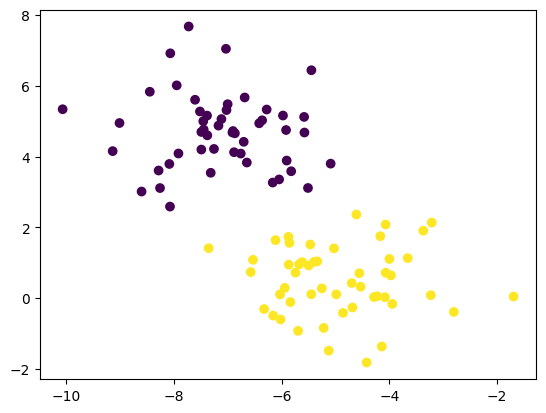

In [22]:
plt.scatter(X[:,0],X[:,1], c=y)

In [44]:
#X_add = np.hstack([np.ones((len(X),1)),X])

In [48]:
#w = np.random.rand(3)
w = np.random.rand(2)
w_trace = []
w_trace.append(w)
point = []
for epoch in range(1):
  for i in range(len(X)):
    #if y[i] * X_add[i, :].dot(w) < 0:
    if y[i] * X[i, :].dot(w) < 0:
            #w = w + y[i] * X_add[i, :]
            w = w + y[i] * X[i, :]
            w_trace.append(w)
            point.append(X[i,:])


In [55]:
fig, ax = plt.subplots(figsize=(5, 5))
x_min = min(X[:,0])
x_max = max(X[:,0])
y_min = min(X[:,1])
y_max = max(X[:,1])
x = np.arange(x_min, x_max, 0.1)
def update(frame):
    i = frame
    ax.clear()
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    #ax.scatter(x, -(w_trace[i][0] + w_trace[i][1] * x) / w_trace[i][2])
    ax.scatter(x, -(w_trace[i][0]* x) / w_trace[i][1])
    if i<len(w_trace)-1:
      ax.scatter(point[i][0], point[i][1], c='r')
    ax.set_title(f'Frame {i + 1}', fontsize=18)

ani = FuncAnimation(fig, update, frames=range(len(w_trace)), repeat=False)

HTML(ani.to_jshtml())
#plt.show()

#Logistic Regression

In [ ]:
X, y = make_moons(noise=0.1)

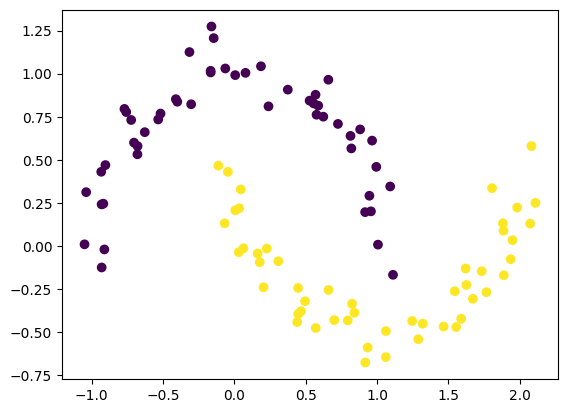

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X,y)

LogisticRegression()

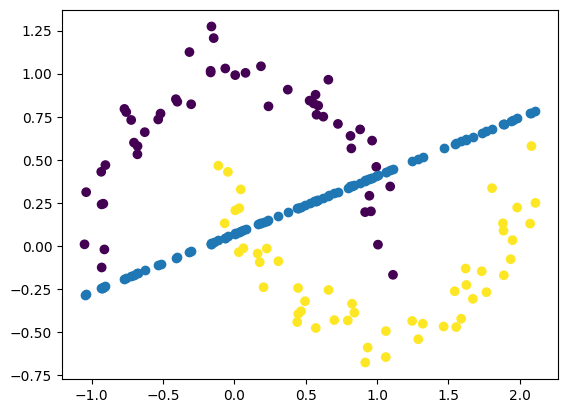

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X[:,0], -(clf.intercept_+clf.coef_[0][0]*X[:,0])/clf.coef_[0][1])

##Custom Transform

In [ ]:
X_poly = np.hstack([X, X**2])

In [ ]:
class my_transform:
  def fit(self, X, y=None, sample_weight=None):
    #self.col = 3
    self.X = X
    return self

  def transform(self, X, y=None, sample_weight=None):
    return np.hstack([X, X**2, (X[:,0]*X[:,1]).reshape(-1,1)])
    #return np.hstack([np.exp(-((X-self.X[j,:])**2).dot(np.array([[1],[1]]))) for j in range(len(self.X))]) #np.hstack((X, X[:,self.col].reshape(-1,1)**(2)))

  def __str__(self):
    return "my_transform()"

  def __repr__(self):
    return "my_transform()"

In [ ]:
pipe = Pipeline([('my_transformer', my_transform()), ('classifier', LogisticRegression())])

In [ ]:
pipe.fit(X,y)

Pipeline(steps=[('my_transformer', my_transform()),
                ('classifier', LogisticRegression())])

<Axes: >

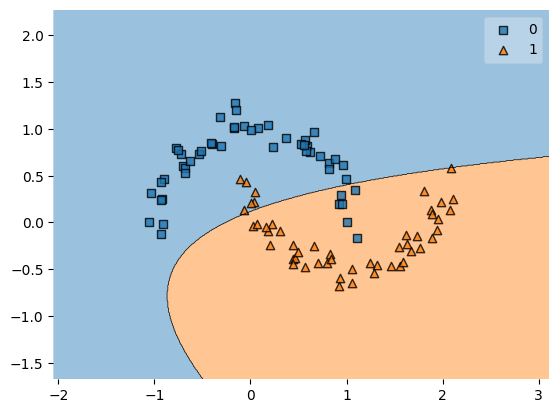

In [ ]:
plot_decision_regions(X,y,pipe)

##Polynomial transform

In [ ]:
poly = PolynomialFeatures(3)

In [ ]:
pipe2 = Pipeline([('poly', PolynomialFeatures(3)), ('classifier', LogisticRegression())])

In [ ]:
pipe2.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('classifier', LogisticRegression())])

<Axes: >

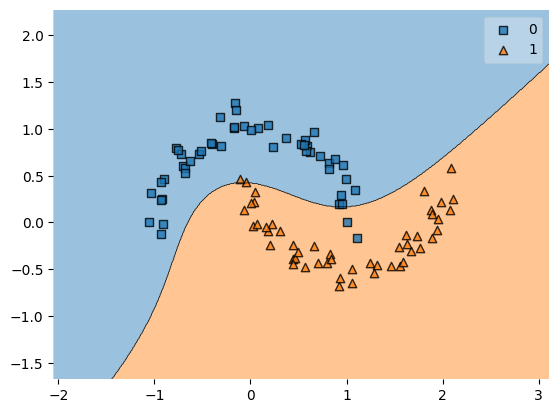

In [ ]:
plot_decision_regions(X,y,pipe2)